Entrenamiento vs Exploracion == selección de acción epsilon-greedy
    Maximiso las acciones con mayor recompensa

In [48]:
import numpy as np

np.random.seed(42)

mu, sigma = 0, 1
q = {k+1: v for k, v in enumerate(np.random.normal(mu, sigma, 8))} # almaceno 10 numeros random
q

{1: 0.4967141530112327,
 2: -0.13826430117118466,
 3: 0.6476885381006925,
 4: 1.5230298564080254,
 5: -0.23415337472333597,
 6: -0.23413695694918055,
 7: 1.5792128155073915,
 8: 0.7674347291529088}

entrenamiento del agente

In [49]:
# partidas de entrenamiento
partidas = 1000
turnos = 100
epsilons = [0, 0.01, 0.1,]
recompensas_medias = np.zeros((len(epsilons), turnos)) # inicializo las recompensas medias
acciones_optimas = np.zeros((len(epsilons), turnos)) # inicializo las acciones optimas

# Creo las partidas a jugar
for game in range(partidas):
    mejor_accion = max(q, key=q.get) # obtengo la mejor accion a tomar
    for i, e in enumerate(epsilons): # juego las partidas con los diferentes valores de epsilon
        Q = {k: 0 for k in range(1,6)} # inicializo las acciones // Q = mejores valores
        acciones = {k: 0 for k in range(1,6)} # inicializo las acciones // acciones = cantidad de veces que se toma la accion
        recompensas = {k: 0 for k in range(1,6)} # inicializo las acciones // recompensas = suma de las recompensas
        for experience in range(turnos):
            if np.random.uniform(0,1) < e: # si el numero random es menor al epsilon
                action = np.random.randint(5) + 1 # tomo una accion random
            else:
                maxQ = -100 # inicializo el maximo valor en negativo, no sabemos cual es el mejor valor
                for j in range(1, 6): # recorro las acciones
                    if Q[j] > maxQ: # si el valor de la accion es mayor al maximo valor
                        maxQ = Q[j] # actualizo el maximo valor
                        action = j # actualizo la accion
            acciones[action] += 1 # sumo 1 a la accion
            recompensa = q[action] # obtengo la recompensa
            recompensas[action] += recompensa # sumo la recompensa

            Q[action] = recompensas[action] / acciones[action] # actualizo el valor de la accion
            recompensas_medias[i][experience] += recompensa # sumo la recompensa
            acciones_optimas[i][experience] += (action == mejor_accion) # sumo 1 si la accion es la mejor

# paso los datos para la grafica
recompensas_medias /= partidas
acciones_optimas /= partidas
            

Grafico las 3 opciones de epsilon

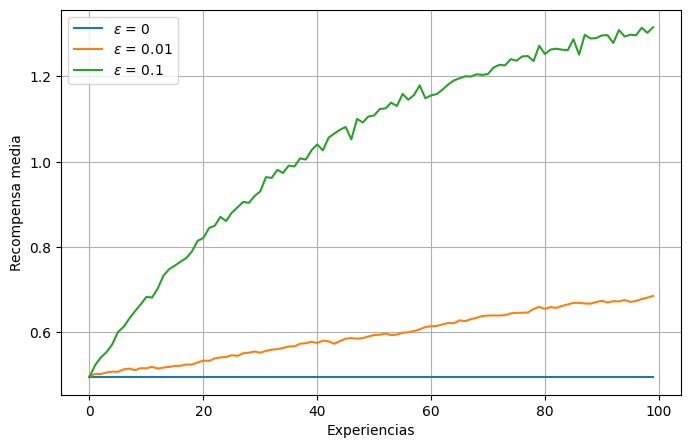

: 

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
for i, e in enumerate(epsilons):
    plt.plot(recompensas_medias[i], label=f'$\epsilon$ = {e}')
plt.legend()
plt.grid(True)
plt.xlabel('Experiencias')
plt.ylabel('Recompensa media')
plt.show()